# House Rent India
### Analise das variáveis e seleção para modelo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

df = pd.read_csv(r'C:/Users/berna/Downloads/House_Rent_Dataset.csv')
pd.set_option('display.max_rows', 500)
#print(df.describe())
#Taking off the outliers:
print(df[df['Bathroom'] == 10].index)
print(df[df['Rent'] == df.describe()['Rent']['max']].index)
df = df.drop(index=[1837,4185]) #Outliers
df = df.reset_index()
df = df.drop(columns=['index'])

Int64Index([4185], dtype='int64')
Int64Index([1837], dtype='int64')


In [3]:
#Verificando a cardinalidade das variaveis categóricas.
#See how is frequency and cardinalidade of the categorical variables.
#Iremos tentar diminuir a dimensão das variavéis que contém varias categórias.

In [4]:
def freq_data(df):
    df_2 = df.copy()
    dict_len = {'feature':[],'dtypes':[],'len(unique)':[],
                'most_frequent':[],'most_frequent(name)':[]}
    for i in df_2.columns:
        dict_len['feature'].append(i)
        dict_len['dtypes'].append(df[i].dtypes)
        dict_len['len(unique)'].append(len(df_2[i].unique()))
        dict_len['most_frequent(name)'].append(df_2[i].value_counts(100).sort_values(ascending=False).index[0])
        dict_len['most_frequent'].append(df_2[i].value_counts(100).sort_values(ascending=False).values[0])
        df_feature = pd.DataFrame(dict_len)
        df_feature = df_feature.sort_values(by='len(unique)',ascending=False)
    return df_feature
freq_data(df)


,feature,dtypes,len(unique),most_frequent,most_frequent(name)
6,Area Locality,object,2234,0.007799,Bandra West
3,Size,int64,614,0.050590,1000
4,Floor,object,480,0.079890,1 out of 2
2,Rent,int64,242,0.057968,15000
0,Posted On,object,81,0.065556,2022-07-06
10,Bathroom,int64,7,0.482926,2
1,BHK,int64,6,0.477445,2
7,City,object,6,0.204890,Mumbai
5,Area Type,object,3,0.515388,Super Area
8,Furnishing Status,object,3,0.474283,Semi-Furnished


## Posted ON
Nota-se que temos uma crescente nos valores dos aluguéis de acordo com aumento dos meses.

       Posted On   Rent
0     2022-05-18  10000
1     2022-05-13  20000
2     2022-05-16  17000
3     2022-07-04  10000
4     2022-05-09   7500
...          ...    ...
4739  2022-05-18  15000
4740  2022-05-15  29000
4741  2022-07-10  35000
4742  2022-07-06  45000
4743  2022-05-04  15000

[4744 rows x 2 columns]
                  Rent              
                   sum count average
Month_number                        
4              4348075   228   19070
5             46321945  1681   27556
6             65803290  1857   35435
7             45905610   978   46938


C:\Users\berna\AppData\Local\Temp\ipykernel_21424\1639817420.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent['Month_number'] = df_rent['Posted On'].astype({'Posted On': 'datetime64[ns]'})
C:\Users\berna\AppData\Local\Temp\ipykernel_21424\1639817420.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rent['Month_number'] = df_rent['Month_number'].dt.month


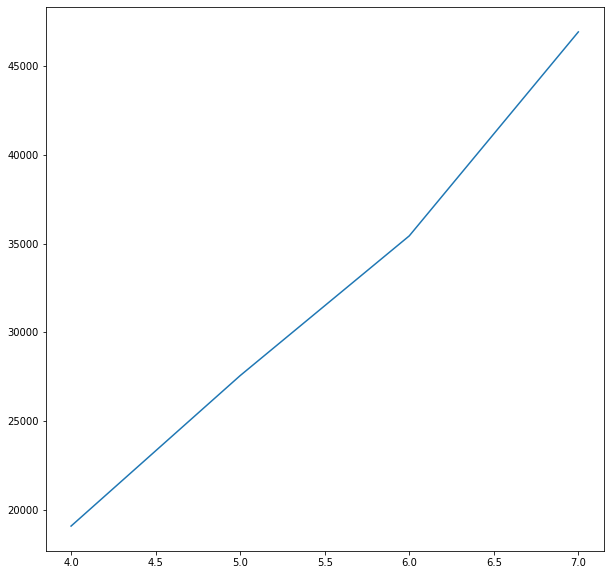

In [5]:
#redução da dimensionalidade da Coluna Posted On

#Groupy by month,week
#Semana 1,2,3,4,5,6
df_rent = df[['Posted On','Rent']]
print(df_rent)
def posted_on():
    #df_rent['Week_number'] = df_rent['Posted On'].astype({'Posted On': 'datetime64[ns]'}).dt.isocalendar().week
    df_rent['Month_number'] = df_rent['Posted On'].astype({'Posted On': 'datetime64[ns]'})
    df_rent['Month_number'] = df_rent['Month_number'].dt.month
    #print(sorted(df_rent['Week_number'].unique()))
    #display(df_rent.sort_values(by='Posted On',ascending=True))
    df_results = df_rent.groupby(by=['Month_number']).agg({'Rent':['sum','count']})
    df_results['Rent','average'] = (df_results['Rent','sum']/df_results['Rent','count']).astype('int')
    print(df_results)
    plt.figure(figsize=(10,10))
    plt.plot(sorted(df_rent.loc[:,'Month_number'].unique()),df_rent.groupby(by='Month_number').mean()['Rent'])
    return df_rent
posted_on()
df['Month'] = df_rent['Month_number']

##  Floor

C:\Users\berna\AppData\Local\Temp\ipykernel_21424\325723078.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  type4 = df_floor[df_floor['Floor'].str.contains(r'(out of)')]


                     Rent                    
                      sum count     sum/count
Tipo_casa                                    
Cobertura         1449000    23  63000.000000
Predio Grande   101957157  1673  60942.711895
Predio Pequeno   58972763  3048  19348.019357
       Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4739  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4740  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4741  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4742  2022-07-06    3  45000  1500     23 ou

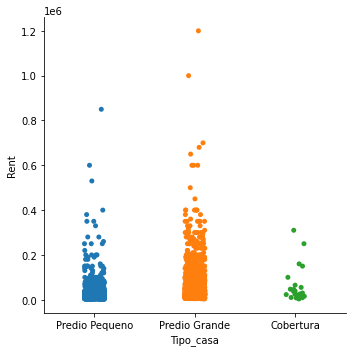

In [6]:
df_floor = pd.DataFrame()
df_floor['Floor'] = df['Floor'].copy()
#Tipo de categotias que temos em ['Floor']
type4 = df_floor[df_floor['Floor'].str.contains(r'(out of)')]
#Colunas serem preenchidas
df_floor['Number_floor'] = np.nan
df_floor['Total_floor'] = np.nan
df_floor['Tipo_casa'] = np.nan

#Armazenamento de dados
def floor(tipo):
    for i in tipo.index:
        #if tipo == 'type1':
        df_floor.loc[i,'Number_floor'] = df_floor.loc[i,'Floor'].split('out of')[0]
        df_floor.loc[i,'Total_floor'] = df_floor.loc[i,'Floor'].split('out of')[-1]
        #elif tipo == 'type2':
            #df_floor.loc[i,'Total_floor'] = df_floor.loc[i,'Floor'].split()
    return df_floor
floor(type4)
df_floor['Rent'] = df['Rent'].copy()
df_floor = df_floor.fillna(0)
df_floor['Total_floor'] = df_floor['Total_floor'].astype('int')
for i in range(len(df_floor)):
    if df_floor.loc[i,'Number_floor'] == 'Upper Basement ': 
        df_floor.loc[i,'Tipo_casa'] = 'Cobertura'
    else: 
        if df_floor.loc[i,'Total_floor'] >= 5:
            df_floor.loc[i,'Tipo_casa'] = 'Predio Grande'
        else:
            df_floor.loc[i,'Tipo_casa'] = 'Predio Pequeno'
df_results = df_floor.groupby('Tipo_casa').agg({'Rent':['sum','count']})
df_results['Rent','sum/count'] = df_results['Rent','sum']/df_results['Rent','count']
print(df_results)
sns.catplot(x ='Tipo_casa' , y ='Rent',
           data =df_floor)
df['Type_House'] = df_floor['Tipo_casa']
print(df)

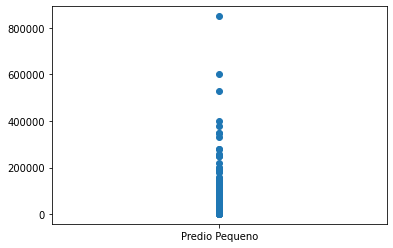

In [7]:
a=df_floor[df_floor['Tipo_casa']=='Predio Pequeno']['Tipo_casa']
b=df_floor[df_floor['Tipo_casa']=='Predio Pequeno']['Rent']
plt.scatter(a,b)

In [8]:
def check_variable(x,y,df):
    df_aux = pd.DataFrame()
    df_aux[x] = df[x].copy()
    df_aux[y] = df[y].copy()
    
    print(df_aux[x].value_counts(100))
    group = df_aux.groupby(by=x).sum()
    group['per'] = group.apply(lambda x: x/x.sum())
    print(group.sort_values(y,ascending=False))

    df_results = df_aux.groupby(x).agg({y:['sum','count']}).sort_values([(y,'sum')],ascending=False)
    df_results[y,'average'] = (df_results[y,'sum']/df_results[y,'count']).astype('int')
    print(df_results)

    sns.catplot(x = x , y = y,
               data =df_aux)   
    return

In [9]:
## City

Mumbai       0.204890
Chennai      0.187816
Bangalore    0.186551
Hyderabad    0.182757
Delhi        0.127530
Kolkata      0.110455
Name: City, dtype: float64
               Rent       per
City                         
Mumbai     82932211  0.510733
Chennai    19258156  0.118600
Bangalore  18620200  0.114671
Delhi      17824500  0.109771
Hyderabad  17641782  0.108646
Kolkata     6102071  0.037579
               Rent              
                sum count average
City                             
Mumbai     82932211   972   85321
Chennai    19258156   891   21614
Bangalore  18620200   885   21039
Delhi      17824500   605   29461
Hyderabad  17641782   867   20348
Kolkata     6102071   524   11645


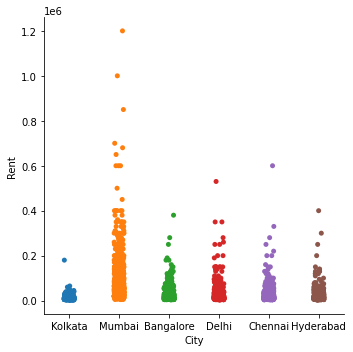

In [10]:
check_variable('City','Rent',df)

In [11]:
## Area Type

Super Area     0.515388
Carpet Area    0.484191
Built Area     0.000422
Name: Area Type, dtype: float64
                  Rent       per
Area Type                       
Carpet Area  116882792  0.719815
Super Area    45475128  0.280056
Built Area       21000  0.000129
                  Rent              
                   sum count average
Area Type                           
Carpet Area  116882792  2297   50884
Super Area    45475128  2445   18599
Built Area       21000     2   10500


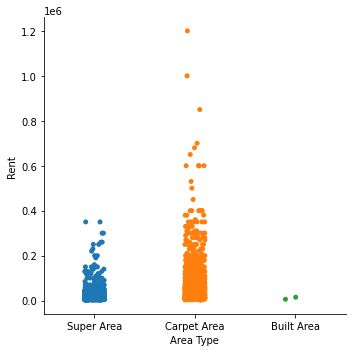

In [12]:
check_variable('Area Type','Rent',df)
df['Area Type'].replace('Built Area','Super Area',inplace=True)

In [13]:
## Furnishing Status

Semi-Furnished    0.474283
Unfurnished       0.382378
Furnished         0.143339
Name: Furnishing Status, dtype: float64
                       Rent       per
Furnishing Status                    
Semi-Furnished     83656043  0.515190
Unfurnished        40567869  0.249835
Furnished          38155008  0.234975
                       Rent              
                        sum count average
Furnishing Status                        
Semi-Furnished     83656043  2250   37180
Unfurnished        40567869  1814   22363
Furnished          38155008   680   56110


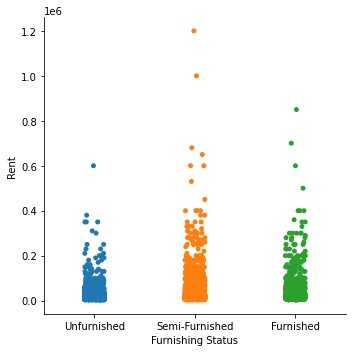

In [14]:
check_variable('Furnishing Status','Rent',df)

In [15]:
## Tenant Preferred

Bachelors/Family    0.725759
Bachelors           0.174747
Family              0.099494
Name: Tenant Preferred, dtype: float64
                       Rent       per
Tenant Preferred                     
Bachelors/Family  107289970  0.660738
Bachelors          31479349  0.193864
Family             23609601  0.145398
                       Rent              
                        sum count average
Tenant Preferred                         
Bachelors/Family  107289970  3443   31161
Bachelors          31479349   829   37972
Family             23609601   472   50020


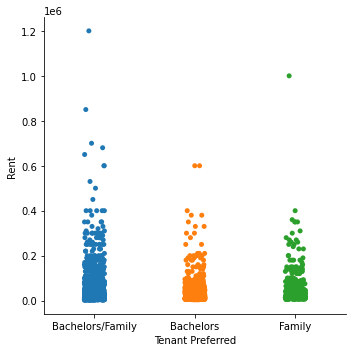

In [16]:
check_variable('Tenant Preferred','Rent',df)

In [17]:
## Point of Contact

Contact Owner      0.677698
Contact Agent      0.322091
Contact Builder    0.000211
Name: Point of Contact, dtype: float64
                       Rent       per
Point of Contact                     
Contact Agent     108852692  0.670362
Contact Owner      53520728  0.329604
Contact Builder        5500  0.000034
                       Rent              
                        sum count average
Point of Contact                         
Contact Agent     108852692  1528   71238
Contact Owner      53520728  3215   16647
Contact Builder        5500     1    5500


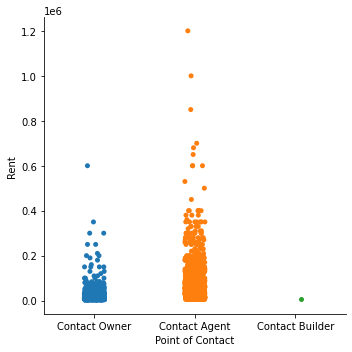

In [18]:
check_variable('Point of Contact','Rent',df)
df['Point of Contact'].replace('Contact Builder','Contact Owner',inplace=True)

### One Hot Encoder

In [45]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
pd.set_option('display.max_rows',500)
list_features = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred',
                         'Point of Contact', 'Type_House','Month']
def OHE(list_features):    
    oh = OneHotEncoder()
    #print(df.columns)
    feature_values = oh.fit_transform(df[list_features]).toarray()
    feature_labels = oh.categories_
    feature_labels = np.array(feature_labels).ravel()
    colunas = []
    for i in feature_labels:
        for j in i:
            colunas.append(j)
    df_categorica = pd.DataFrame(feature_values, columns = colunas)

    df_numerica = df[['BHK','Size','Bathroom']]
    df_final = pd.merge(df_categorica,df_numerica,left_index=True,right_index=True)
    return df_final
df_final = OHE(list_features)
                 
#print(df_final[df_final.duplicated() == True]) ## Podemos fazer teste de com/sem esses valores
#duplicados na variavel X.

C:\Users\berna\AppData\Local\Temp\ipykernel_21424\30853648.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  feature_labels = np.array(feature_labels).ravel()


## Models

score train 0.5243002155051364
MAE test 22072.037961550544
MSE test 2485849510.342635
RMSE test 49858.2942983676


C:\Users\berna\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\berna\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\berna\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\berna\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str'

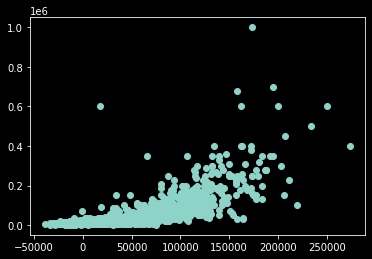

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score,precision_score,accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error

X = df_final.copy()
y = df['Rent']



X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)        
lr = LinearRegression()
model = lr.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('score train',model.score(X_train,y_train))
print('MAE test',mean_absolute_error(y_test,y_pred))
print('MSE test',mean_squared_error(y_test,y_pred))
print('RMSE test',np.sqrt(mean_squared_error(y_test,y_pred)))
plt.scatter(model.predict(X_train),y_train)



In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import style

X = df_final.copy()
y = df['Rent']


def sm_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)  
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    lr_sm = sm.OLS(y_train,X_train).fit()
    y_pred = lr_sm.predict(X_test)
    return lr_sm.summary()
sm_model(X,y)
#Correlações das variáveis
#style.use('dark_background')
#fig, ax = plt.subplots(figsize=(20,20))
#sns.heatmap(X.corr(),annot=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     205.2
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:52:13   Log-Likelihood:                -42617.
No. Observations:                3558   AIC:                         8.527e+04
Df Residuals:                    3538   BIC:                         8.540e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7686.0980   1093.286     -7.030      0.000   -9829.632   -5542.564
Carpet Area      -2885.0807    965.334     -2.989      0.003   -4777.747    -992.414
Super Area       -4801.0174   1033.599     -4.645      0.000   -6827.527   -2774.508
Bangalore        -9907.5465   1462.803     -6.773      0.000   -1.28e+04   -7039.524
Chennai          -1.302e+04   1487.739     -8.748      0.000   -1.59e+04   -1.01e+04
Delhi             1076.6445   1776.013      0.606      0.544   -2405.468    4558.757
Hyderabad         -2.09e+04   1542.772    -13.550      0.000   -2.39e+04   -1.79e+04
Kolkata          -9042.8361   1891.014     -4.782      0.000   -1.28e+04   -5335.248
Mumbai            4.411e+04   1916.801     23.011      0.000    4.03e+04    4.79e+04
Furnished         4036.9885   1361.965      2.964      0.003    1366.674    6707.304
Semi-Furnished   -6119.6704   1009.770     -6.060      0.000   -8099.460   -4139.881
Unfurnished      -5603.4162   1019.140     -5.498      0.000   -7601.577   -3605.256
Bachelors        -2093.9415   1387.725     -1.509      0.131   -4814.763     626.880
Bachelors/Family  1098.1160   1058.289      1.038      0.300    -976.802    3173.034
Family           -6690.2726   1616.881     -4.138      0.000   -9860.385   -3520.160
Contact Agent      361.7191   1232.734      0.293      0.769   -2055.223    2778.661
Contact Owner    -8047.8172   1080.541     -7.448      0.000   -1.02e+04   -5929.271
Cobertura         1950.9151   6249.594      0.312      0.755   -1.03e+04    1.42e+04
Predio Grande    -6680.0870   2845.512     -2.348      0.019   -1.23e+04   -1101.078
Predio Pequeno   -2956.9261   2870.268     -1.030      0.303   -8584.473    2670.621
4                -2549.6398   2374.272     -1.074      0.283   -7204.720    2105.441
5                -1627.2596   1189.126     -1.368      0.171   -3958.702     704.183
6                -2388.6648   1171.379     -2.039      0.042   -4685.310     -92.019
7                -1120.5339   1451.384     -0.772      0.440   -3966.167    1725.100
BHK               2535.9115   1465.581      1.730      0.084    -337.558    5409.381
Size                32.5521      1.759     18.511      0.000      29.104      36.000
Bathroom          1.263e+04   1487.062      8.491      0.000    9711.275    1.55e+04
==============================================================================
Omnibus:                     4741.033   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1725070.257
Skew:                           7.253   Prob(JB):                         0.00
Kurtosis:                     109.892   Cond. No.                     4.07e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

#### Retirando variaveis correlacionadas

In [77]:
#print(X.corr() > 0.5)
X_new = X.copy()
#high_corr = ['Carpet Area','Contact Agent','Super Area','Contact Owner',]
#['BHK','Size','Bathroom']
X_new['Size/BHK'] = X_new['Size']/(X_new['BHK'] + X_new['Bathroom'])
X_new = X_new.drop(columns=['BHK','Size','Bathroom','Delhi','Bachelors','Bachelors/Family','Contact Agent','Cobertura',
                        'Predio Pequeno',4,5,7,6])
sm_model(X_new,y)

#Quando tiramos as variáveis sem significância percebe-se que nosso modelo perde quase 0.2 de R2 
# e ainda há presença de multicolinearidade

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     142.4
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          8.05e-292
Time:                        19:56:07   Log-Likelihood:                -43239.
No. Observations:                3558   AIC:                         8.650e+04
Df Residuals:                    3545   BIC:                         8.658e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.057e+04   1814.973      5.826      0.000    7015.127    1.41e+04
Carpet Area     6680.7133   1164.258      5.738      0.000    4398.030    8963.397
Super Area      3892.9101   1443.164      2.697      0.007    1063.394    6722.426
Bangalore      -1.544e+04   2972.730     -5.193      0.000   -2.13e+04   -9608.272
Chennai        -8917.9242   2953.830     -3.019      0.003   -1.47e+04   -3126.546
Hyderabad      -1.356e+04   3096.317     -4.379      0.000   -1.96e+04   -7487.310
Kolkata        -1.635e+04   3281.094     -4.984      0.000   -2.28e+04   -9920.197
Mumbai          3.572e+04   3280.864     10.888      0.000    2.93e+04    4.22e+04
Furnished       1.208e+04   1717.741      7.030      0.000    8707.229    1.54e+04
Semi-Furnished  3127.4475   1225.186      2.553      0.011     725.308    5529.587
Unfurnished    -4628.9125   1250.097     -3.703      0.000   -7079.895   -2177.930
Family          -470.2347   2636.228     -0.178      0.858   -5638.912    4698.442
Contact Owner  -2.493e+04   2312.830    -10.781      0.000   -2.95e+04   -2.04e+04
Predio Grande   5259.0068   2147.580      2.449      0.014    1048.389    9469.624
Size/BHK         141.8579      9.377     15.128      0.000     123.473     160.243
==============================================================================
Omnibus:                     4456.130   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           964948.748
Skew:                           6.640   Prob(JB):                         0.00
Kurtosis:                      82.577   Cond. No.                     2.27e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.31e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
## Removing Multicollinearity.
#As vezes voce só precisa de uma variável para explicar o resto das outras podendo chegar no melhor
#modelo.
#Nota-se que ao fazer o Vif das dummys encontra-se valores altissimos.

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_new = X.copy()


def vif(X):
    df_vif = pd.Series([variance_inflation_factor(X.values, i) 
                   for i in range(X.shape[1])], 
                  index=X.columns).sort_values(ascending=False)
    return df_vif 
def correlograma(X):  
    style.use('dark_background')
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(X.corr(),annot=True)
    return
#Nota-se que será quase impossível retirar a multicolinearidade desse modelo, então um método
#bem conhecido e que achei é o de pca, entretanto reduz nosso R2...
